# **One Sample Z-Test**

Suppose an e-commerce platform receives an average of 100 visitors per day (known population mean). <br>
We want to test if the average number of visitors for a recent sample of 40 days is significantly different from this known average. Verify the claim at significance level alpha = 0.05. <br>
**• Null Hypothesis (HO):** The average number of visitors for the sample period is not significantly different from the population mean. I.e. Sample Mean = 100 <br>
**• Alternative Hypothesis (HA):** The average number of visitors for the sample period is significantly different from the population average. ie Sample Mean ≠ 100

In [68]:
import numpy as np
import pandas as pd
from scipy import stats

In [69]:
pop_mean = 100           # Average visitors ( Population mean )
pop_sd = 15              # Population standard deviation

In [70]:
# recent 40 days visitors count
visitors = [117, 119, 132, 106, 106, 133, 121, 102, 118,
            103, 103, 113, 81, 84, 101, 94, 114, 96, 88,
            131, 106, 111, 88, 101, 111, 92, 115, 100, 105,
            100, 137, 109, 94, 122, 91, 113, 80, 90, 112 ]

In [71]:
# create dataframe

df = pd.DataFrame({ "visitors" : visitors})

# **Function to perform Z-Test**

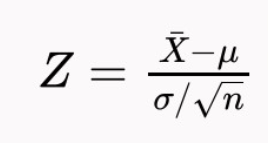

In [72]:
#z = (sample_mean pop_mean) / (pop_sd / sqrt(sample_size))

def z_test(data, pop_mean, pop_sd):
    sample_mean = data.mean()
    sample_size = len(data)
    z_score = (sample_mean - pop_mean) / (pop_sd / np.sqrt(sample_size))
    p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))
    return z_score, p_value

In [73]:
# perform Z-Test

z_score, p_value = z_test(df['visitors'], pop_mean, pop_sd)

In [74]:
print(f"Z - Score: {z_score}")
print(f"P - Value: {p_value}")

Z - Score: 2.55137525062772
P - Value: 0.010729872895687054


## **Conclusion**

In [75]:
alpha = 0.05

In [76]:
if p_value < alpha:
    print("Reject the null hypothesis: \nThe average no of visitors for the sample period is significantly different from the known average.")

else:
    print("Fail to reject the null hypothesis: \nThe average no of visitors for the sample period is not significantly different from the known average.")

Reject the null hypothesis: 
The average no of visitors for the sample period is significantly different from the known average.


## **Why the Null Hypothesis is Rejected**

If the z-score calculated from your sample data is sufficiently large (either positive or negative), it indicates that the sample mean is far from the hypothesized mean, leading to a low p-value. In this case, the low p-value suggests that the observed difference between the sample mean and the population mean is unlikely to have occurred by random chance, hence the rejection of the null hypothesis. <br> <br>

**For example** if the average number of visitors over the 40 days was significantly higher or lower than 100, the z-test would produce a high z-score and a low p-value, leading to rejection of the null hypothesis.

# **Two Sample Z-Test**

Suppose an e-commerce platform runs two different campaigns to drive traffic to their website. We want to test if there is a significant difference in the average number of daily visitors between the two campaigns. <br>
**• Null Hypothesis (HO):** There is no significant difference in the average number of daily
visitors between the two campaigns. I.e. µ₁ = με <br>
**• Alternative Hypothesis (HA):** There is a significant difference in the average number of daily visitors between the two campaigns. i.e. μι ≠ με

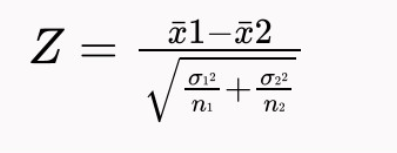

In [77]:
import numpy as np
import pandas as pd
from scipy import stats

In [78]:
# Sample data for the two campaigns

campaign1_data = [157,147,159,172,146,146,173,161,142,158,
                  143,143,153,121,124,141,134,154,136,128,
                  171,146,151,128,141,151,132,155,140,145,
                  140,177,149,134,162,131,153,120,130,152]

campaign2_data = [178,167,181,195,166,166,196,183,162,179,
                  162,162,174,137,140,160,152,175,154,145,
                  194,166,171,145,160,171,150,176,159,165,
                  159,201,169,152,183,149,173,136,147,173]

In [79]:
# Convert Data to dataframe

df_camp1 = pd.DataFrame({"visitors": campaign1_data})
df_camp2 = pd.DataFrame({"visitors": campaign2_data})

In [80]:
# Campaign 1 parameter (mean, std, sample size)

camp1_mean = df_camp1['visitors'].mean()
camp1_std = df_camp1['visitors'].std()
n1 = len(df_camp1)

In [81]:
# Campaign 2 parameter (mean, std, sample size)

camp2_mean = df_camp2['visitors'].mean()
camp2_std = df_camp2['visitors'].std()
n2 = len(df_camp2)

In [82]:
# Z-score  = ( sample1_mean - sample2_mean ) / sqrt( ( sample1_std / n1 ) + ( sample2_std / n2 ))

z_score = ( camp1_mean - camp2_mean ) / np.sqrt((( camp1_std ** 2) / n1 ) + ( camp2_std ** 2 ) / n2)

In [83]:
# P - Value

p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))

In [84]:
print(f"Campaign 1 mean: {camp1_mean}")
print(f"Campaign 2 mean: {camp2_mean}")
print(f"Z - Score: {z_score}")
print(f"P - Value: {p_value}")

Campaign 1 mean: 146.15
Campaign 2 mean: 165.825
Z - Score: -5.771857099686556
P - Value: 7.840259330649246e-09


In [85]:
alpha = 0.05

In [86]:
if p_value < alpha:
    print("Reject the null hypothesis: \nThere is a significant difference in the average no of daily visitors beetween the two campaigns.")

else:
    print("Fail to reject the null hypothesis: \nThere is a significant difference in the average no of daily visitors beetween the two campaigns.")

Reject the null hypothesis: 
There is a significant difference in the average no of daily visitors beetween the two campaigns.


## **Why the Null Hypothesis is Rejected:**

The null hypothesis is rejected because the z-test has shown that the difference between the means of the two campaigns is statistically significant. This means the observed difference in the number of visitors between Campaign 1 and Campaign 2 is too large to be attributed to random variation, implying that one campaign is more effective than the other.

# **One sample T-Test**

**Example:** An eComm platform believes that the average number of daily visitors is 150. Test if the average number of visitors for a sample of 20 days is significantly different from this value. <br>
**• HO:** The sample mean is not significantly different from the population mean. <br>
**• HA:** The sample mean is significantly different from the population mean

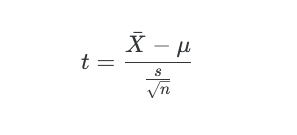

In [87]:
#Number of visitors for 28 days
visitors = [157, 147, 159, 172, 146, 146, 173, 161, 142, 158,
            143, 143, 153, 121, 124, 141, 134, 154, 136, 128]

In [88]:
# population mean
pop_mean = 150
t_score, p_value = stats.ttest_1samp(visitors, popmean=pop_mean)

In [89]:
print(f"T-Statistics: {t_score}")
print(f"P-Value: {p_value}")

T-Statistics: -0.9679294783122818
P-Value: 0.34524012885098876


In [90]:
alpha = 0.05

In [91]:
if p_value < alpha:
    print("Reject the null hypothesis")

else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


## **Why the Null Hypothesis is Not Rejected:** 

    Insufficient Evidence: The t-test results (p-value) suggest that any observed difference between the sample mean and the population mean could plausibly occur due to random variation. The sample mean is not significantly different from the hypothesized population mean.

    Small Effect Size: The difference between the sample mean and the population mean might be too small to be detected as statistically significant, given the sample size and variability in the data.

The failure to reject the null hypothesis means that, based on the data from the 28 days, there isn't enough evidence to conclude that the average number of visitors is significantly different from the hypothesized population mean of 150 visitors per day.

# **Two Sample T-Test**

Example: A dataset contains Male and Female students marks. We need to test the means marks of Male students are not equal to Female students <br>
• HO: The means of Marks for Male and Female students are equal <br>
• HA: The means of Marks for Male and Female students are not equal

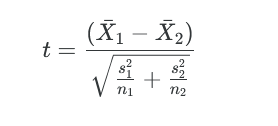

In [92]:
data = {
    'Gender': ['Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 
               'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 
               'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 
               'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male'],
    'Marks': [77, 89, 89, 91, 76, 85, 79, 78, 93, 88, 91, 77, 81, 88, 86, 88, 82, 95, 87, 83, 79, 
              94, 84, 73, 85, 85, 78, 88, 81, 82, 84, 86, 75, 83, 87, 88, 90, 90, 92, 92]
}


In [93]:
df = pd.DataFrame(data)

In [94]:
df

,Gender,Marks
0,Female,77
1,Male,89
2,Female,89
3,Female,91
4,Male,76
5,Male,85
6,Male,79
7,Male,78
8,Female,93
9,Female,88


In [95]:
male_marks = df[df['Gender'] == 'Male']['Marks']
female_marks = df[df['Gender'] == 'Female']['Marks']

In [96]:
t_statistic, p_value = stats.ttest_ind(male_marks, female_marks)

In [97]:
print(f"T-Statistics: {t_statistic}")
print(f"P-Value: {p_value}")

T-Statistics: 0.13871155690189338
P-Value: 0.89041059197865


In [98]:
alpha = 0.05

In [99]:
if p_value < alpha:
    print("Reject the null hypothesis: \nThere is a significant difference in the mean of marks for males and female.")

else:
    print("Fail to reject the null hypothesis: \nThere is a significant difference in the mean of marks for males and female.")

Fail to reject the null hypothesis: 
There is a significant difference in the mean of marks for males and female.


## **Why the Null Hypothesis is failed to Reject:**

**Small Effect Size:** The difference in average marks between males and females might be too small to be detected as statistically significant given the sample size and variability.<br>

**Sample Variability:** If the marks within each gender group have a high degree of variability, this can obscure any real difference in the means.<br>

**Sample Size:** If the sample size is not large enough, the test might not have enough power to detect a small but significant difference.

# **Paired T-Test**

Let’s say you have data on the number of visitors to your e-commerce platform on 20 days before and after a marketing campaign, and you want to know if the campaign had a significant effect on the number of visitors. <br>
**Data:**<br> <br>

    Before the Campaign (visitors_before):
    157, 147, 159, 172, 146, 146, 173, 161, 142, 158, 143, 143, 153, 121, 124, 141, 134, 154, 136, 128

    After the Campaign (visitors_after):
    162, 150, 163, 178, 149, 150, 179, 167, 145, 162, 148, 147, 159, 127, 130, 147, 140, 160, 141, 135

**Hypotheses:**

    H0H0​ (Null Hypothesis): The mean difference between the before and after campaign visitors is zero (no effect).
    H1H1​ (Alternative Hypothesis): The mean difference between the before and after campaign visitors is not zero (there is an effect).

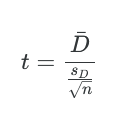



Where:

    Dˉ = mean of the differences between paired observations
    sD = standard deviation of the differences
    nn = number of pairs

In [100]:
visitors_before = [157, 147, 159, 172, 146, 146, 173, 161, 142, 158, 143, 143, 153, 121, 124, 141, 134, 154, 136, 128]
visitors_after = [162, 150, 163, 178, 149, 150, 179, 167, 145, 162, 148, 147, 159, 127, 130, 147, 140, 160, 141, 135]

In [101]:
# Perform paired t-test

t_score, p_value = stats.ttest_rel(visitors_after, visitors_before)

In [102]:
print(f"T-Statistic: {t_score}")
print(f"P-Value: {p_value}")

T-Statistic: 18.296115464910958
P-Value: 1.5967643663411888e-13


In [103]:
alpha = 0.05

In [104]:
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


## **Why the Null Hypothesis is Rejected:**

**Significant Difference:** The calculated t-statistic would have been large enough, and the corresponding p-value small enough (typically less than 0.05), to conclude that the observed difference between the means is unlikely to be due to random chance.<br>

**Increase in Visitors:** If the visitors' counts after the campaign are consistently higher than before, the average difference (after - before) would be positive, leading to a t-statistic that supports rejecting the null hypothesis. <br>

**Statistical Evidence:** The rejection of the null hypothesis means there is sufficient statistical evidence to conclude that the campaign had a significant effect on increasing the number of visitors to the website.